<a href="https://colab.research.google.com/github/aryanarke2003/data-analysis/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
# Load data
households = pd.read_csv('400_households.csv')
products = pd.read_csv('400_products.csv')
transactions = pd.read_csv('400_transactions.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load data
households = pd.read_csv('400_households.csv')
products = pd.read_csv('400_products.csv')
transactions = pd.read_csv('400_transactions.csv')

# Preprocessing and cleaning data
# Replace NaN values in CHILDREN with 0
households['CHILDREN'] = households['CHILDREN'].fillna(0)
# Convert '3+' in CHILDREN to 3 or a higher value if desired
households['CHILDREN'] = households['CHILDREN'].replace('3+', 3)  # You can replace 3 with a higher number if needed
households['CHILDREN'] = households['CHILDREN'].astype(int)

# Remove extra spaces from column names
households.columns = households.columns.str.strip()
products.columns = products.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

# One-hot encoding for categorical variables
categorical_features = ['AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HH_SIZE', 'HSHD_COMPOSITION']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")



In [ ]:
# Fit the transformer object
transformer.fit(households[categorical_features])
transformed_X = transformer.fit_transform(households[categorical_features])

# Merging the data
# Assuming that customer engagement can be represented by the number of transactions
transactions['COUNT'] = 1
# Aggregate transaction counts by 'HSHD_NUM'
transaction_counts = transactions.groupby('HSHD_NUM').size().reset_index(name='COUNT')
# Merge the data
households = households.merge(transaction_counts, on='HSHD_NUM', how='left')
households['COUNT'].fillna(0, inplace=True)

# Preparing the data for the regression model
X = transformed_X
y = households['COUNT']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)

# Fit the OneHotEncoder object
one_hot.fit(households[categorical_features])

# Output the coefficients to understand impact
feature_names = one_hot.get_feature_names_out(categorical_features)
print("Feature coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef}")

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 score: {r2}")
print(f"Mean Squared Error: {mse}")


Feature coefficients:
AGE_RANGE_19-24                                                                                                                                                                                                   : 868.5227400287151
AGE_RANGE_25-34                                                                                                                                                                                                   : 72.9212373495121
AGE_RANGE_35-44                                                                                                                                                                                                   : 277.58077992680063
AGE_RANGE_45-54                                                                                                                                                                                                   : -308.20254215381743
AGE_RANGE_55-64                                         

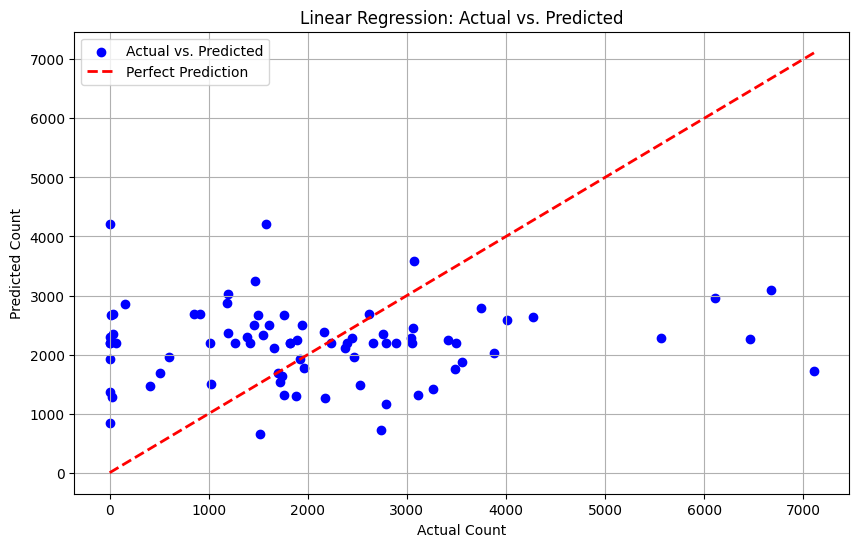

In [ ]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)

# Plot the linear regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Extract feature coefficients
feature_coefficients = dict(zip(feature_names, model.coef_))

# Sort feature coefficients by absolute magnitude
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print top features by absolute coefficient value
print("Top features affecting customer engagement:")
for feature, coef in sorted_coefficients[:2]:  # Extract the top two features
    print(f"{feature}: {coef}")


Top features affecting customer engagement:
HSHD_COMPOSITION_1 Adult and Kids : 1877.6492937046396
MARITAL_Single : -1416.0877712920212


In [ ]:
# Create a dictionary to store coefficients for each category
category_coefficients = {}

# Iterate through the coefficients and categorize them
for feature, coef in zip(feature_names, model.coef_):
    category = feature.split("_", 1)[0]  # Extract category name from feature name
    if category not in category_coefficients:
        category_coefficients[category] = []
    category_coefficients[category].append(coef)

# Calculate the average coefficient for each category
average_category_coefficients = {category: np.mean(coefs) for category, coefs in category_coefficients.items()}

# Sort categories by average coefficient
sorted_categories = sorted(average_category_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print the categories with positive and negative coefficients
print("Categories with positive coefficients (indicating growth in customer engagement):")
for category, coef in sorted_categories[:5]:  # Assuming you want to see the top 5 growing categories
    print(f"{category}: {coef}")

print("\nCategories with negative coefficients (indicating shrinkage in customer engagement):")
for category, coef in sorted_categories[-5:]:  # Assuming you want to see the top 5 shrinking categories
    print(f"{category}: {coef}")


Categories with positive coefficients (indicating growth in customer engagement):
HSHD: 3.4512075736919152e-12
HH: -1.6579330501069003e-13
INCOME: -3.840991017308884e-12
AGE: -4.774847184307873e-12
MARITAL: -8.337034766251842e-12

Categories with negative coefficients (indicating shrinkage in customer engagement):
HH: -1.6579330501069003e-13
INCOME: -3.840991017308884e-12
AGE: -4.774847184307873e-12
MARITAL: -8.337034766251842e-12
HOMEOWNER: -2.2737367544323206e-11
